In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("climate_risk.csv")

# Step 3: Show shape and first few rows
print("✅ Data Loaded. Shape is:", df.shape)
df.head()

✅ Data Loaded. Shape is: (8445, 16)


,gvkey,capex_m_lag_w,roaq_lag_w,bk_leverage_lag_w,ppe_lag_w,logatq_lag_w,tobin_q_w,qtr,tran_risk_w_std,tran_risk_pro_w_std,tran_risk_npro_w_std,phy_risk_acute_w_std,phy_risk_chronic_w_std,ticker,company_name,industry_naics
0,1004,0.775370,0.091727,0.285182,0.177044,7.708725,1.042455,1,0.000000,0.0,0.00000,0.0,0.0,AIR,AAR CORP,42
1,1004,2.169838,0.032214,0.101650,0.194719,7.323171,0.934373,3,0.000000,0.0,0.00000,0.0,0.0,AIR,AAR CORP,42
2,1004,0.990099,0.029251,0.116016,0.191637,7.344202,0.930979,4,0.000000,0.0,0.00000,0.0,0.0,AIR,AAR CORP,42
3,1045,12.023182,0.150515,0.409038,0.527381,10.686727,1.724105,1,0.392152,0.0,0.42695,0.0,0.0,AAL,AMERICAN AIRLINES GROUP INC,48
4,1045,3.219026,0.171135,0.404714,0.514223,10.752655,1.489920,2,0.000000,0.0,0.00000,0.0,0.0,AAL,AMERICAN AIRLINES GROUP INC,48


In [2]:
# Step 4: Quick summary of numeric variables
df.describe()

,gvkey,capex_m_lag_w,roaq_lag_w,bk_leverage_lag_w,ppe_lag_w,logatq_lag_w,tobin_q_w,qtr,tran_risk_w_std,tran_risk_pro_w_std,tran_risk_npro_w_std,phy_risk_acute_w_std,phy_risk_chronic_w_std,industry_naics
count,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000
mean,71535.790527,2.813668,0.066843,0.241885,0.227368,7.361016,2.106143,2.482771,0.302291,0.215747,0.297933,0.053886,0.171568,41.569923
std,72208.806875,3.811831,0.194666,0.202001,0.246928,1.975698,1.689967,1.119925,1.165528,1.138499,1.165133,0.749877,1.097871,12.614957
min,1004.000000,0.000000,-0.961535,0.000000,0.000000,0.734769,0.456377,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,12081.000000,0.519244,0.030258,0.059302,0.041770,5.988455,1.100701,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
50%,26012.000000,1.486849,0.100947,0.221542,0.125174,7.360468,1.567835,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000
75%,147639.000000,3.474840,0.156357,0.379472,0.332506,8.657859,2.396666,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000
max,315318.000000,21.543647,0.456322,1.008877,0.893409,14.762194,14.824114,4.000000,14.915733,13.901446,15.146430,17.084373,14.444571,99.000000


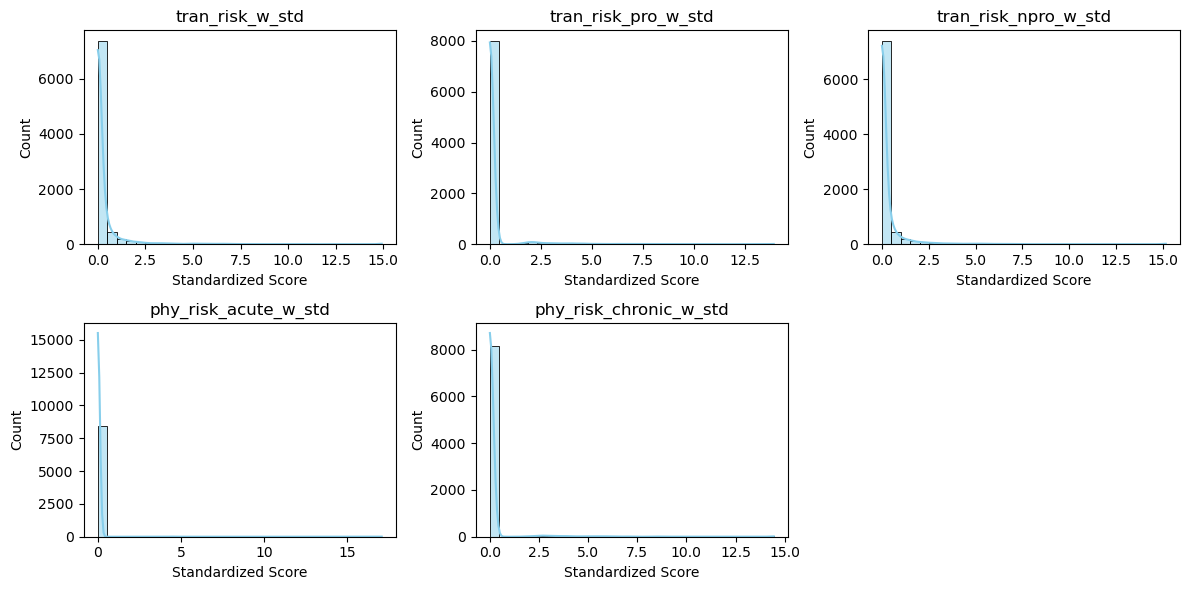

In [3]:
# Step 5: Plot histograms of climate talk variables
climate_vars = [
    'tran_risk_w_std',
    'tran_risk_pro_w_std',
    'tran_risk_npro_w_std',
    'phy_risk_acute_w_std',
    'phy_risk_chronic_w_std'
]

plt.figure(figsize=(12, 6))
for i, var in enumerate(climate_vars):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[var], kde=True, bins=30, color='skyblue')
    plt.title(var)
    plt.xlabel("Standardized Score")
plt.tight_layout()
plt.show()

In [4]:
import statsmodels.api as sm

# Step 6: Regression function to test a climate variable
def run_regression(var):
    X = df[[var]]
    X = sm.add_constant(X)  # adds intercept
    y = df['tobin_q_w']
    model = sm.OLS(y, X).fit()
    print(f"\n🔎 Regression: tobin_q_w ~ {var}")
    print(model.summary())

# Run regression on each climate measure
for var in climate_vars:
    run_regression(var)


🔎 Regression: tobin_q_w ~ tran_risk_w_std
                            OLS Regression Results                            
Dep. Variable:              tobin_q_w   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     58.70
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           2.04e-14
Time:                        20:16:57   Log-Likelihood:                -16384.
No. Observations:                8445   AIC:                         3.277e+04
Df Residuals:                    8443   BIC:                         3.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [5]:
# Step 7: Multiple regression with financial controls
def run_controlled_regression(var):
    controls = [
        'roaq_lag_w',
        'logatq_lag_w',
        'bk_leverage_lag_w',
        'capex_m_lag_w'
    ]
    X = df[[var] + controls]
    X = sm.add_constant(X)
    y = df['tobin_q_w']
    model = sm.OLS(y, X).fit()
    print(f"\n📊 Regression: tobin_q_w ~ {var} + controls")
    print(model.summary())

In [6]:
# Run controlled regressions for all 5 climate variables
for var in climate_vars:
    run_controlled_regression(var)


📊 Regression: tobin_q_w ~ tran_risk_w_std + controls
                            OLS Regression Results                            
Dep. Variable:              tobin_q_w   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     168.1
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          6.06e-171
Time:                        20:23:42   Log-Likelihood:                -16013.
No. Observations:                8445   AIC:                         3.204e+04
Df Residuals:                    8439   BIC:                         3.208e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/var/folders/fn/jt5qr9913558wtd5j9vqvx0h0000gn/T/ipykernel_25066/2779643426.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='proactive_bucket', y='tobin_q_w', palette='Blues')
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


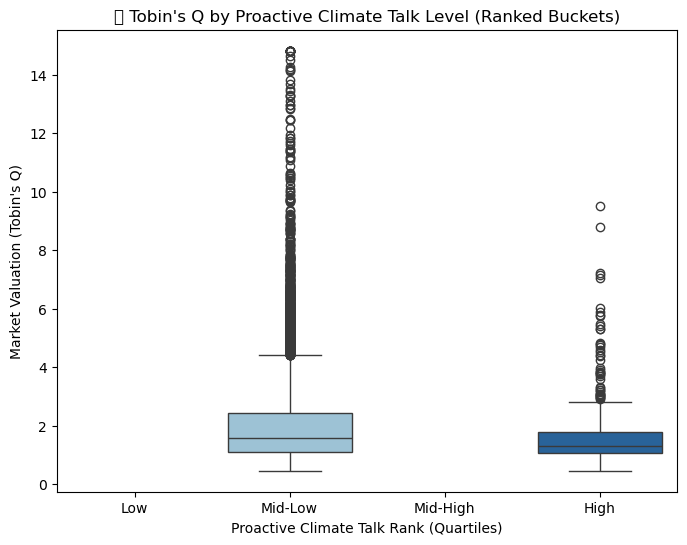

In [13]:
# Step 8 (bulletproof): Rank firms and bin into 4 buckets
df_clean = df[['tran_risk_pro_w_std', 'tobin_q_w']].dropna().copy()

# Rank companies and normalize from 0 to 1
df_clean['rank'] = df_clean['tran_risk_pro_w_std'].rank(method='average', pct=True)

# Bin into 4 groups based on rank
df_clean['proactive_bucket'] = pd.cut(
    df_clean['rank'],
    bins=[0, 0.25, 0.5, 0.75, 1.0],
    labels=['Low', 'Mid-Low', 'Mid-High', 'High'],
    include_lowest=True
)

# Plot Tobin's Q by proactive climate talk bucket
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='proactive_bucket', y='tobin_q_w', palette='Blues')
plt.title("📈 Tobin's Q by Proactive Climate Talk Level (Ranked Buckets)")
plt.xlabel("Proactive Climate Talk Rank (Quartiles)")
plt.ylabel("Market Valuation (Tobin's Q)")
plt.show()